# Semianr 10 - Applied Quantitative Logistics

## Particle Swarm Optimization (PSO) - Binary

In [1]:
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Hub Location Allocation

In [2]:
def hubLocation():
    
    ### Customer Data
    xc = [74, 146, 41, 70, 176, 60, 1, 54, 149, 60, 132, 199, 2,
          31, 176, 127, 71, 78, 71, 151, 145, 37, 157, 139, 27,
          138, 97, 104, 137, 83, 67, 196, 152, 149, 148, 56, 64, 31, 31, 52]
    
    yc = [79, 95, 149, 185, 106, 175, 144, 63, 165, 81, 164, 132, 110, 118,
          29, 13, 52, 158, 73, 172, 103, 172, 69, 90, 104, 102, 70, 162, 192,
          195, 178, 153, 41, 57, 67, 5, 83, 146, 122, 2]
    
    d = [20, 15, 99, 32, 12, 8, 86, 26, 56, 38, 27, 15, 87, 83, 94, 34, 79,
         56, 10, 46, 99, 67, 43, 84, 45, 81, 83, 89, 30, 78, 78, 21, 75, 93,
         70, 16, 20, 48, 88, 54]
    
    N = len(xc)     # Number of customers
    
    ### Service Center Data
    xs = [2, 52, 166, 126, 100, 165, 198, 76, 76, 105, 44,
          125, 82, 25, 5, 58, 74, 75, 171, 51]
    
    ys = [126, 196, 104, 28, 4, 32, 122, 35, 123, 45, 2, 158,
          25, 101, 109, 74, 102, 159, 42, 100]
    
    M = len(xs)     # Number of potential service centers
    
    D = np.zeros([N-1, M-1])
    for i in range(N-1):
        for j in range(M-1):
            D[i][j] = math.sqrt(abs(xc[i]-xs[j] + yc[i]-ys[j]))
    
    model = {'N': N,
             'M': M,
             'xc': xc,
             'yc': yc,
             'xs': xs,
             'ys': ys,
             'd': d,
             'D': D}
    
    return model

### Create Random Solution

In [3]:
def createRandomSolution(model):
    M = model['M']
    f = list(np.random.randint(0, 2, M))
    
    return f

### Cost Function

In [4]:
def myCost(f, model):
    
    global NFE
    
    if pd.isna(NFE):
        NFE = 0
        
    NFE += 1
    
    if (np.all(np.array(f) == 0)):
        z = math.inf
        return z
    
    N = model['N']
    M = model['M']
    D = model['D']
    
    D_min = np.zeros(N)
    
    for i in range(0, N-1):
        D_temp = []
        for j in range(0, M-1):
            if f[j] == 1:
                D_temp.append(D[i][j])
                
        D_min[i] = min(D_temp)
        
    z = sum(np.array(model['d']) * np.array(D_min))
    
    return z

### PSO Algorithm - Binary

In [5]:
### Problem Definition
model = hubLocation()

nPar = model['M']

global NFE
NFE = 0

# Store all NFE
nfe = [NFE]

# PSO Parameters
maxIter = 200
swarmSize = 40
C1 = 2
C2 = 4-C1

Position, Costs, Velocity, LBPosition, LBCosts = [], [], [], [], []

# Store Global Solution
GBPosition = createRandomSolution(model)
GBCost = math.inf

BestCost_list = [GBCost]

# Initialize Swarms
for i in range(swarmSize):
    Position.append(createRandomSolution(model))
    Velocity.append(list(np.random.random_sample(nPar)))
    Costs.append(myCost(Position[i], model))
    
    LBPosition.append(Position[i])
    LBCosts.append(Costs[i])
    
    if LBCosts[i] < GBCost:
        GBPosition = LBPosition[i]
        GBCost = LBCosts[i]
        
### PSO Main Loop
for it in range(maxIter):
    
    for ii in range(swarmSize):
        
        # Velocity Update
        Velocity[ii] = list(C1*np.random.random()*(np.array(LBPosition[ii]) - np.array(Position[ii])) \
                           + C2*np.random.random()*(np.array(GBPosition) - np.array(Position[ii])))
        
        # Position Update
        SigV = 1/(1+np.exp(-np.array(Velocity[ii])))
        my_rand = np.random.random_sample(nPar)
        Position[ii] = [int(SigV[k] > my_rand[k]) for k in range(len(SigV))]
        Costs[ii] = myCost(Position[ii], model)
        
        # Update Global and Local Best
        if Costs[ii] < LBCosts[ii]:
            LBPosition[ii] = Position[ii]
            LBCosts[ii] = Costs[ii]
            
        if LBCosts[ii] < GBCost:
            GBPosition = LBPosition[ii]
            GBCost = LBCosts[ii]
            
    BestCost_list.append(GBCost)
    
    # Append NFE to my array
    nfe.append(NFE)
    
    print(f'Iteration: {it}, NFE: {nfe[-1]}, Best Cost: {BestCost_list[it]}')

Iteration: 0, NFE: 80, Best Cost: inf
Iteration: 1, NFE: 120, Best Cost: 5099.922796916466
Iteration: 2, NFE: 160, Best Cost: 4536.18672646672
Iteration: 3, NFE: 200, Best Cost: 4417.163517740862
Iteration: 4, NFE: 240, Best Cost: 4417.163517740862
Iteration: 5, NFE: 280, Best Cost: 4308.476285457252
Iteration: 6, NFE: 320, Best Cost: 4308.476285457252
Iteration: 7, NFE: 360, Best Cost: 4308.476285457252
Iteration: 8, NFE: 400, Best Cost: 4308.476285457252
Iteration: 9, NFE: 440, Best Cost: 4308.476285457252
Iteration: 10, NFE: 480, Best Cost: 4308.476285457252
Iteration: 11, NFE: 520, Best Cost: 4308.476285457252
Iteration: 12, NFE: 560, Best Cost: 4308.476285457252
Iteration: 13, NFE: 600, Best Cost: 4308.476285457252
Iteration: 14, NFE: 640, Best Cost: 4308.476285457252
Iteration: 15, NFE: 680, Best Cost: 4308.476285457252
Iteration: 16, NFE: 720, Best Cost: 4308.476285457252
Iteration: 17, NFE: 760, Best Cost: 4308.476285457252
Iteration: 18, NFE: 800, Best Cost: 4308.476285457252


Iteration: 153, NFE: 6200, Best Cost: 4232.622349106249
Iteration: 154, NFE: 6240, Best Cost: 4232.622349106249
Iteration: 155, NFE: 6280, Best Cost: 4232.622349106249
Iteration: 156, NFE: 6320, Best Cost: 4232.622349106249
Iteration: 157, NFE: 6360, Best Cost: 4232.622349106249
Iteration: 158, NFE: 6400, Best Cost: 4232.622349106249
Iteration: 159, NFE: 6440, Best Cost: 4232.622349106249
Iteration: 160, NFE: 6480, Best Cost: 4232.622349106249
Iteration: 161, NFE: 6520, Best Cost: 4232.622349106249
Iteration: 162, NFE: 6560, Best Cost: 4232.622349106249
Iteration: 163, NFE: 6600, Best Cost: 4232.622349106249
Iteration: 164, NFE: 6640, Best Cost: 4232.622349106249
Iteration: 165, NFE: 6680, Best Cost: 4232.622349106249
Iteration: 166, NFE: 6720, Best Cost: 4232.622349106249
Iteration: 167, NFE: 6760, Best Cost: 4232.622349106249
Iteration: 168, NFE: 6800, Best Cost: 4232.622349106249
Iteration: 169, NFE: 6840, Best Cost: 4232.622349106249
Iteration: 170, NFE: 6880, Best Cost: 4232.62234

### Results

Text(0, 0.5, 'Best Cost')

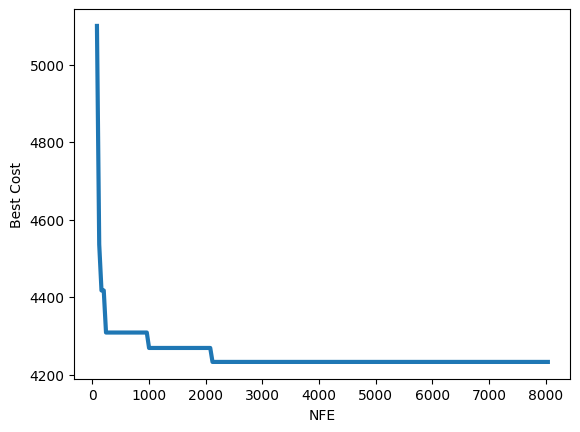

In [6]:
# Plot the result
plt.plot(nfe, BestCost_list, linewidth = 3)
plt.xlabel('NFE')
plt.ylabel('Best Cost')

# HW7 - Applied Quantitative Logistics

Implement PSO Algorithm for continuous problem. You can solve sphere() problem as we did before in previous semenar. Finally compare your result with SA algorithm on the same plot.

Hint: PSO has continuous nature initially. After caculating velocity, there is no neet to convert it to binary by sigma. Just apply the folmula for updating position based on new velovity as we discussed during seminar.

Instruction for submission:

- Please submit your solutions in (.ipynb) format to my email (msohrabi@hse.ru).

- Deadline: **May 5, 2023, 11:59 pm.**

- The subject of the email and file name: **[HW7_AQL]-YOUR_NAME**

### PSO Algorithm - Continuous

In [7]:
def sphere(x):
    
    global NFE
    
    if pd.isna(NFE):
        NFE = 0
        
    NFE += 1
    
    z = [item**2 for item in x]
    
    return sum(z)

In [8]:
### YOUR CODE HERE ###

In [19]:
### Create Random Solution
def createRandomSolution(bounds):
    solution = []
    for lower, upper in bounds:
        solution.append(random.uniform(lower, upper))
        
    return solution

In [60]:
bounds = [(-5.12, 5.12)] * 10
x = createRandomSolution(bounds)
sphere(x)

98.6805218999859

In [110]:
### PSO Algorithm - Continuous
nPar = len(bounds)

global NFE
NFE = 0

# Store all NFE
nfe = [NFE]

# PSO Parameters
maxIter = 200
swarmSize = 40
C1 = 2
C2 = 4-C1
w = 0.9
wdamp = 0.99

Position, Costs, Velocity, LBPosition, LBCosts = [], [], [], [], []

# Store Global Solution
GBPosition = createRandomSolution(bounds)
GBCost = sphere(GBPosition)

BestCost_list = [GBCost]

# Initialize Swarms
for i in range(swarmSize):
    Position.append(createRandomSolution(bounds))
    Velocity.append(list(np.random.uniform(-1, 1, nPar)))
    Costs.append(sphere(Position[i]))
    
    LBPosition.append(Position[i])
    LBCosts.append(Costs[i])
    
    if LBCosts[i] < GBCost:
        GBPosition = LBPosition[i]
        GBCost = LBCosts[i]
        
### PSO Main Loop
for it in range(maxIter):
    
    for ii in range(swarmSize):
        
        # Velocity Update
        Velocity[ii] = list(w*np.array(Velocity[ii]) \
                           + C1*np.random.random()*(np.array(LBPosition[ii]) - np.array(Position[ii])) \
                           + C2*np.random.random()*(np.array(GBPosition) - np.array(Position[ii])))
        
        # Position Update
        Position[ii] = list(np.array(Position[ii]) + np.array(Velocity[ii]))
        Position[ii] = [min(max(Position[ii][j], bounds[j][0]), bounds[j][1]) for j in range(nPar)]
        Costs[ii] = sphere(Position[ii])
        
        # Update Global and Local Best
        if Costs[ii] < LBCosts[ii]:
            LBPosition[ii] = Position[ii]
            LBCosts[ii] = Costs[ii]
            
        if LBCosts[ii] < GBCost:
            GBPosition = LBPosition[ii]
            GBCost = LBCosts[ii]
            
    BestCost_list.append(GBCost)
    
    # Append NFE to my array
    nfe.append(NFE)
    
    # Update Inertia Weight
    w *= wdamp

    print(f'Iteration: {it}, NFE: {nfe[-1]}, Best Cost: {BestCost_list[it]}')

Iteration: 0, NFE: 81, Best Cost: 38.2901240593915
Iteration: 1, NFE: 121, Best Cost: 10.743638929963467
Iteration: 2, NFE: 161, Best Cost: 9.567325635543705
Iteration: 3, NFE: 201, Best Cost: 9.567325635543705
Iteration: 4, NFE: 241, Best Cost: 9.567325635543705
Iteration: 5, NFE: 281, Best Cost: 9.567325635543705
Iteration: 6, NFE: 321, Best Cost: 5.882728325437432
Iteration: 7, NFE: 361, Best Cost: 5.131778692820879
Iteration: 8, NFE: 401, Best Cost: 4.903974450159227
Iteration: 9, NFE: 441, Best Cost: 4.903974450159227
Iteration: 10, NFE: 481, Best Cost: 4.903974450159227
Iteration: 11, NFE: 521, Best Cost: 4.003904390999974
Iteration: 12, NFE: 561, Best Cost: 4.003904390999974
Iteration: 13, NFE: 601, Best Cost: 4.003904390999974
Iteration: 14, NFE: 641, Best Cost: 4.003904390999974
Iteration: 15, NFE: 681, Best Cost: 4.003904390999974
Iteration: 16, NFE: 721, Best Cost: 3.0791353214703574
Iteration: 17, NFE: 761, Best Cost: 2.9882183232966484
Iteration: 18, NFE: 801, Best Cost: 2

Text(0, 0.5, 'Best Cost')

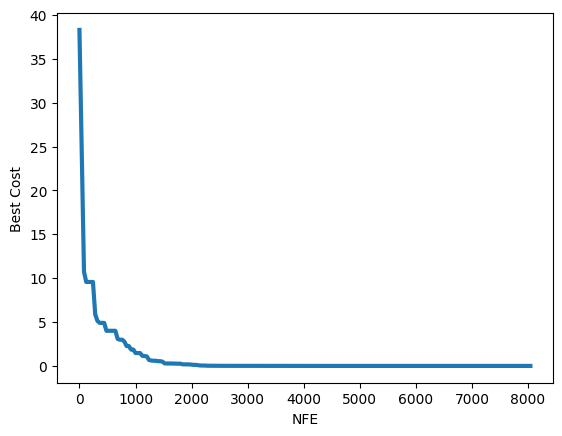

In [111]:
# Plot the result
plt.plot(nfe, BestCost_list, linewidth = 3)
plt.xlabel('NFE')
plt.ylabel('Best Cost')

In [112]:
def rouletteWheelSelection(p):
    r = random.random()

    c = np.cumsum(p)

    indexes = [
        index for index in range(len(c))
        if c[index] > r
    ]

    return indexes[0]

def CreateNeighbor(x, bounds):
    n = len(x)
    xnew = x.copy()
    i = random.randint(0, n-1)
    xnew[i] = x[i] + random.uniform(-1, 1) * (bounds[i][1] - bounds[i][0])
    return xnew

def SAAlgorithm(bounds, maxIt=10000, T0=100, alpha=0.99):

    # Initialization
    sol = createRandomSolution(bounds)
    cost = sphere(sol)
    
    global NFE
    NFE = 0
    # Store all NFE
    nfe = [NFE]
    
    
    BestSol = sol
    BestCost = cost

    BestCost_list = np.zeros(maxIt)     # Array to hold the best results

    T = T0

    for it in range(maxIt):
        # Generate a new solution
        newsol = CreateNeighbor(sol,bounds)
        newcost = sphere(newsol)

        # If the new solution is better, accept it
        if newcost <= cost:
            sol = newsol
            cost = newcost
        # If the new solution is worse, accept it with a certain probability that decreases with temperature
        else:
            DELTA = newcost - cost
            P = math.exp(-DELTA/T)

            r = np.random.random()

            if P >= r:
                sol = newsol
                cost = newcost

        # Save the best solution found so far
        if cost <= BestCost:
            BestSol = sol
            BestCost = cost

        # Save the best cost found at this iteration
        BestCost_list[it] = BestCost
        
        # Append NFE to my array
        nfe.append(NFE)


        print(f'Iteration: {it}, NFE: {nfe[-1]}, Best Cost: {BestCost_list[it]}')

        # Update the temperature
        T = alpha*T

    return nfe,BestCost_list, BestSol

bounds = [(-5.12, 5.12)] * 10
nfe2,BestCost_list2, BestSol = SAAlgorithm(bounds)


Iteration: 0, NFE: 1, Best Cost: 75.83015432619398
Iteration: 1, NFE: 2, Best Cost: 75.83015432619398
Iteration: 2, NFE: 3, Best Cost: 75.83015432619398
Iteration: 3, NFE: 4, Best Cost: 75.83015432619398
Iteration: 4, NFE: 5, Best Cost: 75.83015432619398
Iteration: 5, NFE: 6, Best Cost: 75.83015432619398
Iteration: 6, NFE: 7, Best Cost: 75.83015432619398
Iteration: 7, NFE: 8, Best Cost: 75.83015432619398
Iteration: 8, NFE: 9, Best Cost: 75.83015432619398
Iteration: 9, NFE: 10, Best Cost: 75.83015432619398
Iteration: 10, NFE: 11, Best Cost: 75.83015432619398
Iteration: 11, NFE: 12, Best Cost: 75.83015432619398
Iteration: 12, NFE: 13, Best Cost: 75.83015432619398
Iteration: 13, NFE: 14, Best Cost: 75.83015432619398
Iteration: 14, NFE: 15, Best Cost: 75.83015432619398
Iteration: 15, NFE: 16, Best Cost: 75.83015432619398
Iteration: 16, NFE: 17, Best Cost: 75.83015432619398
Iteration: 17, NFE: 18, Best Cost: 75.83015432619398
Iteration: 18, NFE: 19, Best Cost: 75.83015432619398
Iteration: 1

Text(0, 0.5, 'Best Cost')

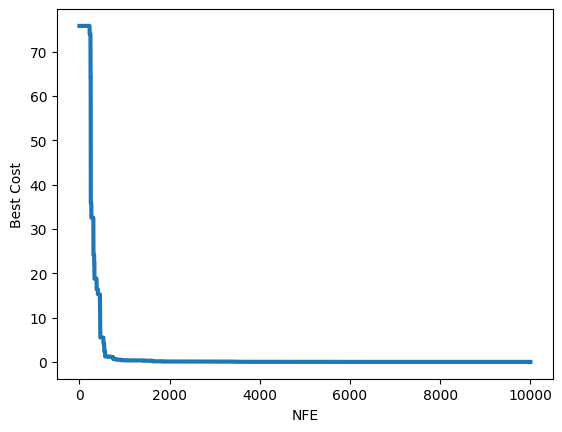

In [114]:
# Plot the result
plt.plot(nfe2[:10000], BestCost_list2, linewidth = 3)
plt.xlabel('NFE')
plt.ylabel('Best Cost')

### Results

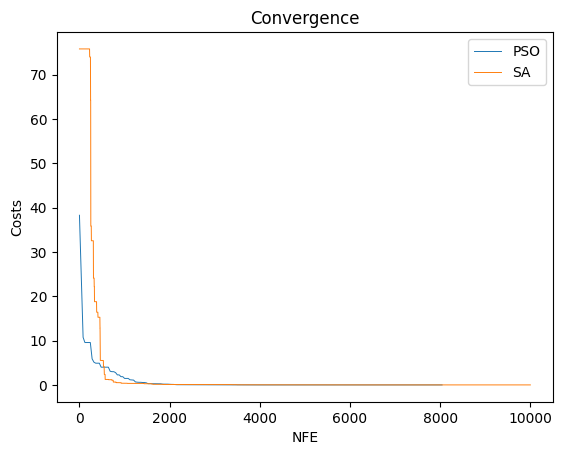

In [115]:
# Plot the result

### YOUR CODE HERE ###

# Plot the result
plt.plot(nfe,BestCost_list, linewidth = 0.7, label = "PSO")
plt.plot(nfe2[:10000],BestCost_list2, linewidth = 0.7, label = "SA")
plt.title("Convergence")
plt.xlabel("NFE")
plt.ylabel('Costs')
plt.legend()
plt.show()

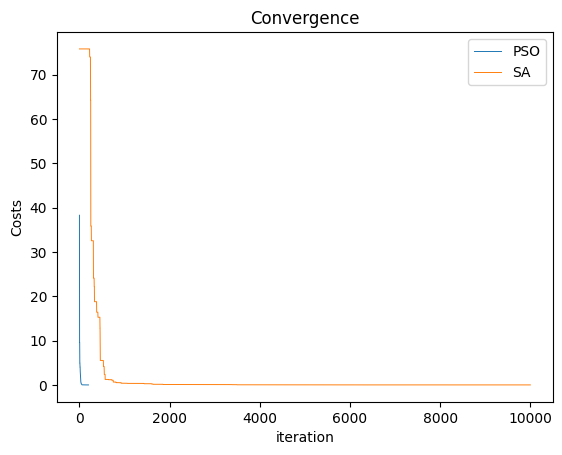

In [118]:
it = np.arange(len(BestCost_list)) 
it2 = np.arange(len(BestCost_list2)) 
# Plot the result
plt.plot(it,BestCost_list, linewidth = 0.7, label = "PSO")
plt.plot(it2,BestCost_list2, linewidth = 0.7, label = "SA")
plt.title("Convergence")
plt.xlabel("iteration")
plt.ylabel('Costs')
plt.legend()
plt.show()